# **DESCRIPTION ABOUT THE DATA**
Please refer to the readme file to take a look at a detailed description of the data.

# **IMPORTING NECESSARY LIBRAIRIES**

In [2]:
# Pandas and numpy for data manipulation
import numpy as np
import pandas as pd

# Matplotlib for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns

# Scikit-learn for machine learning
import sklearn as sk

# KNN imputer from the fancyimpute library(https://pypi.org/project/fancyimpute/)
from fancyimpute import KNN

# Normal distribution model and Spearman's correlation coefficient estimator
from scipy.stats import norm, spearmanr

# **READING THE DATA**
The data for this project is in the file "train.csv"

In [3]:
# Loading train.csv into a dataframe
train_df = pd.read_csv('train.csv')

# view of the first 10 rows
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

This dataset contains 1460 observations and 81 features.

# **DATA CLEANING AND FORMATTING**
The first step is to make sure that the data is reliable, that is handling duplicates, missing values and outliers.
### **DUPLICATES**

In [5]:
train_df.duplicated().sum()

0

#### There are no duplicated observations in the dataset. We can also delete the Id column since it doesn't provide any relevant information.

In [6]:
train_df.drop('Id', axis=1, inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **MISSING VALUES**

Let's take a look at how many missing values we have.

Text(0.5, 1.0, 'Visualizing null values per column')

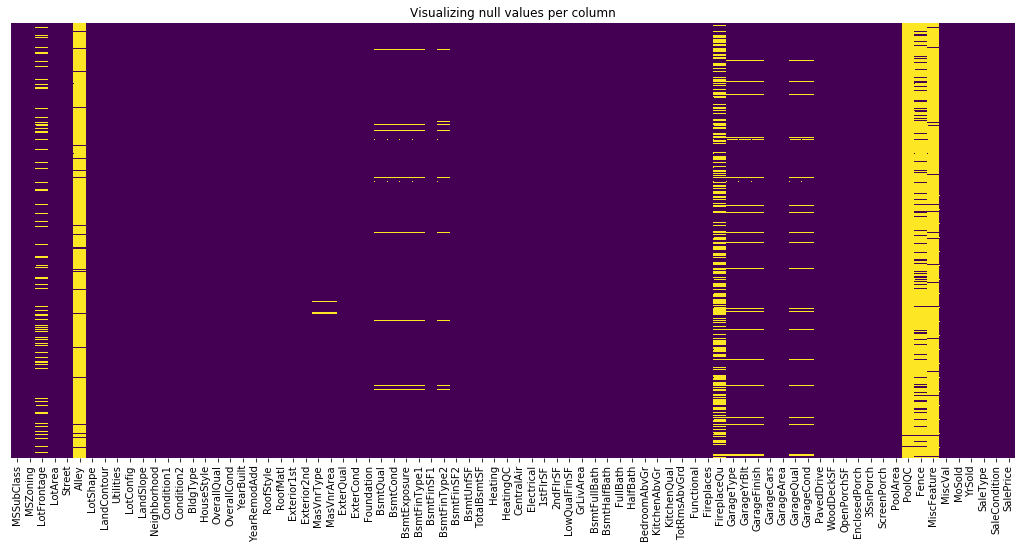

In [7]:
plt.figure(figsize=(18,8))
sns.heatmap(train_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Visualizing null values per column')

As this figure is hard to interpret, let's make a new dataframe of missing values per column

In [8]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_values_count']
missing_df = missing_df.loc[missing_df['missing_values_count'] > 0]
missing_df['percentage'] = 100 * (missing_df['missing_values_count']/len(train_df))
missing_df = missing_df.sort_values(by='missing_values_count', ascending=False)
missing_df

,column_name,missing_values_count,percentage
71,PoolQC,1453,99.520548
73,MiscFeature,1406,96.301370
5,Alley,1369,93.767123
72,Fence,1179,80.753425
56,FireplaceQu,690,47.260274
2,LotFrontage,259,17.739726
57,GarageType,81,5.547945
58,GarageYrBlt,81,5.547945
59,GarageFinish,81,5.547945
62,GarageQual,81,5.547945


Now let's plot the missing values dataframe to make it easier to interpret.

Text(0, 0.5, 'Columns with missing values')

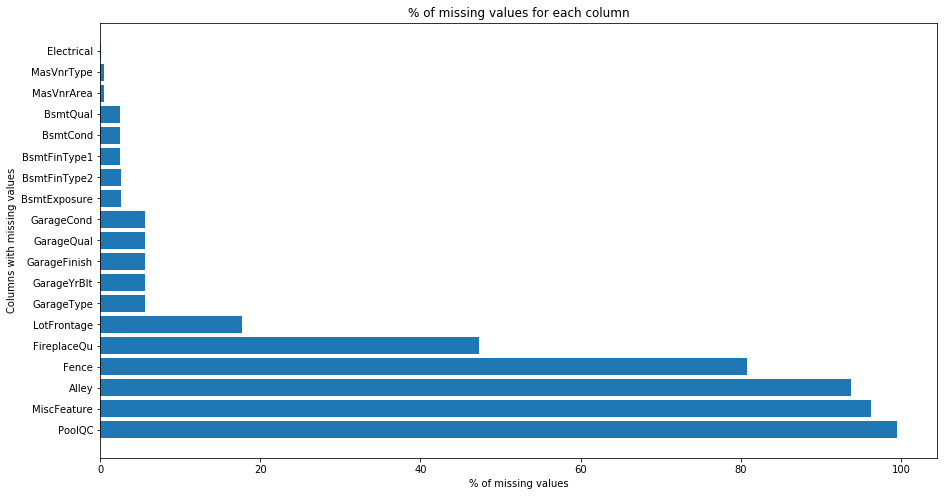

In [9]:
plt.figure(figsize=(15,8))
plt.barh(missing_df.column_name, missing_df.percentage)
plt.title('% of missing values for each column')
plt.xlabel('% of missing values')
plt.ylabel('Columns with missing values')

**Findings:**
- Hardly any missing values for Electrical, MasVnrType and MasVnrArea
- Acceptable amount of null values for BmstQual, BmstCond, BmstFinType1, BmstExposure, BmstFinType2, GarageCond, GarageQual, GarageFinish, GarageType, GarageYrBlt.
- As for LotFrontage, the amount of number of missing values is quite important.
- Large amount of missing values for FireplaceQu, Fence, Alley, MiscFeature and PoolQC.

Let's try and take care of the missing values one variable at a time.

We already know from the description of the data that the null values for:
- BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2 and BsmtExposure indicate that there is no basement.
- GarageType, GarageFinish, GarageQual and GarageCond indicate that there is no garage.
- GarageYrBlt: might be an error in recording. Either there is no garage or the values were not properly recorded.
- FireplaceQu indicate that there is no fireplace.
- Fence indicate that there is no fence.
- Alley indicate that there is no alley.
- MiscFeature indicate that there are no miscellaneous features not covered in other categories.
- PoolQC indicate that there is no pool.

We will use the following strategy to handle missing values:
- If the percentage of missing data is below 5% and that the values are indeed missing, we will drop the observations with missing data. Otherwise we will modify the null values to remove them from the missing_df.
- If the percentage of missing data is above 60% **and** the variable isn't significant then that latter will be dropped, otherwise we will proceed with imputation to fill in missing data points.

First let's modify the null values that aren't actually missing and replace them all with "None".

**BsmtQual - BsmtCond - BsmtFinType1 - BsmtFinType2 - BsmtExposure - FireplaceQu - Fence - Alley - MiscFeature - PoolQC**

In [10]:
train_df[['BsmtQual', 'BsmtCond', 'BsmtFinType1',
          'BsmtFinType2', 'BsmtExposure',
         'FireplaceQu', 'Fence', 'Alley',
          'MiscFeature', 'PoolQC']] = train_df[['BsmtQual', 'BsmtCond', 
                                                'BsmtFinType1', 'BsmtFinType2', 
                                                'BsmtExposure',
                                               'FireplaceQu', 'Fence', 'Alley',
                                                'MiscFeature', 'PoolQC']].fillna('None')

**GarageType - GarageFinish - GarageQual - GarageCond**

Given no information was provided about the possible null values in GarageYrBlt column (year the garage was built), we have to make sure that the indexes of those missing data points match the rest of the null values for every garage related feature, since if there is no garage all related features should be null.

In [11]:
np.unique(train_df.loc[train_df.GarageFinish.isnull() 
            | train_df.GarageType.isnull() | train_df.GarageQual.isnull() | train_df.GarageCond.isnull()].index == train_df.loc[train_df.GarageYrBlt.isnull()].index)

array([ True])

All indexes match. Therefore there are no misrecorded values for the garage related columns. We will replace all null values with "No Garage".

In [12]:
train_df[['GarageType', 'GarageFinish',
          'GarageQual', 'GarageCond', 'GarageYrBlt']] = train_df[['GarageType', 'GarageFinish',
                                                                  'GarageQual', 'GarageCond',
                                                                  'GarageYrBlt']].fillna('None')

We can now recompute missing_df to update the missing data.

In [13]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_values_count']
missing_df = missing_df.loc[missing_df['missing_values_count'] > 0]
missing_df['percentage'] = 100 * (missing_df['missing_values_count']/len(train_df))
missing_df = missing_df.sort_values(by='missing_values_count', ascending=False)
missing_df

,column_name,missing_values_count,percentage
2,LotFrontage,259,17.739726
24,MasVnrType,8,0.547945
25,MasVnrArea,8,0.547945
41,Electrical,1,0.068493


Following the aforementioned strategy, we now must delete missing data points from MasVnrType, MasVnrArea and Electrical.

In [14]:
train_df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

And since the percentage of missing values for LotFrontage is greater than 5% and smaller than 60%, we must perform an imputation.

To fill in the missing values, we will use the **K Nearest Neighbors** method provided in the fancyimpute library

In [15]:
# making a dataframe with only numerical variables to use in the imputation process
numeric_train_df = train_df.select_dtypes(include=['number'])
numeric_train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# we will use k = square root of the length of the dataframe.
k = int(np.sqrt(len(numeric_train_df)))

# making a new dataframe with the imputed values
numeric_train_df_completed = pd.DataFrame(data=KNN(k).fit_transform(numeric_train_df), columns=numeric_train_df.columns, index=numeric_train_df.index)

Imputing row 1/1451 with 0 missing, elapsed time: 0.773
Imputing row 101/1451 with 1 missing, elapsed time: 0.777
Imputing row 201/1451 with 0 missing, elapsed time: 0.780
Imputing row 301/1451 with 0 missing, elapsed time: 0.782
Imputing row 401/1451 with 0 missing, elapsed time: 0.784
Imputing row 501/1451 with 0 missing, elapsed time: 0.786
Imputing row 601/1451 with 0 missing, elapsed time: 0.788
Imputing row 701/1451 with 0 missing, elapsed time: 0.790
Imputing row 801/1451 with 0 missing, elapsed time: 0.791
Imputing row 901/1451 with 0 missing, elapsed time: 0.793
Imputing row 1001/1451 with 1 missing, elapsed time: 0.795
Imputing row 1101/1451 with 0 missing, elapsed time: 0.797
Imputing row 1201/1451 with 1 missing, elapsed time: 0.799
Imputing row 1301/1451 with 0 missing, elapsed time: 0.802
Imputing row 1401/1451 with 0 missing, elapsed time: 0.803


We can now fill in the missing values in LotFrontage

In [17]:
train_df['LotFrontage'] = numeric_train_df_completed['LotFrontage']

In [18]:
# make sure no missing values were left out
train_df.isnull().values.any()

False

# **EXPLORATORY ANALYSIS**
The end goal of this project is to build a model that can accurately predict the price of a house based on some features. 

Therefore this analysis will focus on determining which characteristics have an influence on the price.

### **UNIVARIATE ANALYSIS**
To begin the EDA, we will focus on a single variable, the SalePrice, because this is the target for our machine learning model(s).

In [19]:
train_df.SalePrice.describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The values cluster around 180624 with a standard deviation of approximately 79312.

We notice that the maximum value for this variable is 755000, which is much greater than the 75th percentile so there might be a few outliers in the distribution.

Let's take a look at the distribution of the values

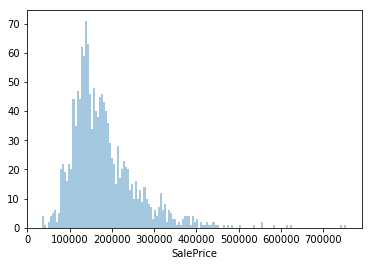

In [20]:
sns.distplot(train_df['SalePrice'], bins=150, kde=False)

Based off this plot alone, we could assume that the dsitribution of the values is asymmetrically normal, with a tail that extends father to the right.

Let's plot the empirical CDF (ECDF) to get a better look at the distribution

In [21]:
#Function to generate the CDF
def generateCDF(sample):
    x = np.sort(sample)
    y = np.linspace(0, 1, len(sample))
    return x,y

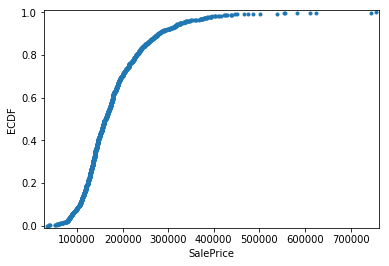

In [22]:
x, y = generateCDF(train_df['SalePrice'])

plt.plot(x, y, marker='.', linestyle='')
plt.xlabel('SalePrice')
plt.ylabel('ECDF')

#margins to keep the data off the plot edges.
plt.margins(0.01)

Is a Normal distribution a good model for the SalePrice?

To find out we can generate a Normal Probability Plot with the following steps:
- First we generate random sample from a Standard Normal Distribution with the same parameters (mean and  standard deviation)
- Then we generate its CDF and plot the two CDFs for comparison.

In [23]:
#parameters to be passed to the standard normal distribution
mean = train_df['SalePrice'].mean()
std = train_df['SalePrice'].std()
size = len(train_df)

#using the rvs (random variates) method from the standard normal distribution we generate a sample with the same parameters.
sample = list(norm(loc=mean, scale=std).rvs(size=size))
xs, ys = generateCDF(sample)

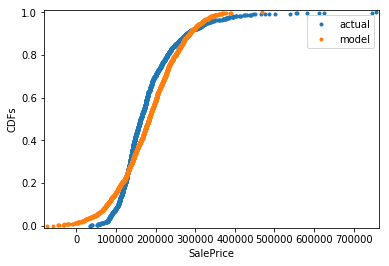

In [24]:
plt.plot(x, y, marker='.', linestyle='', label='actual')
plt.plot(xs, ys, marker='.', linestyle='', label='model')
plt.xlabel('SalePrice')
plt.ylabel('CDFs')
plt.legend()
plt.margins(0.01)

A Normal distribution isn't the best model for the data since it doesn't fit very well.

This leads to one question: Do the logarithms of the SalePrice values have a Normal distribution?

To investigate, we can simply use the same process as above but this time compute the logarithmic values.

In [25]:
log_prices = np.log(train_df['SalePrice'])
x, y = generateCDF(log_prices)

#parameters to be passed to the standard normal distribution
mean = log_prices.mean()
std = log_prices.std()
size = len(train_df)


#using the rvs (random variates) method from the standard normal distribution we generate a sample with the same parameters.
sample = list(norm(loc=mean, scale=std).rvs(size=size))
xs, ys = generateCDF(sample)

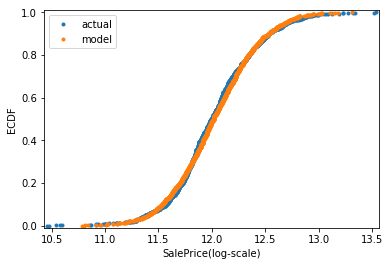

In [26]:
plt.plot(x, y, marker='.', linestyle='', label='actual')
plt.plot(xs, ys, marker='.', linestyle='', label='model')
plt.xlabel('SalePrice(log-scale)')
plt.ylabel('ECDF')
#margins to keep the data off the plot edges.
plt.margins(0.01)
plt.legend()

We can see that this model fits the data better. So a Lognormal distribution might be a better fit than the variable.

As mentionned above there might be some outliers in the distribution of SalePrice.

To visualize them we can use a boxplot and any value outside of the interquartile range will be considered as such.

Text(0.5, 1.0, 'Visualizing outliers in SalePrice')

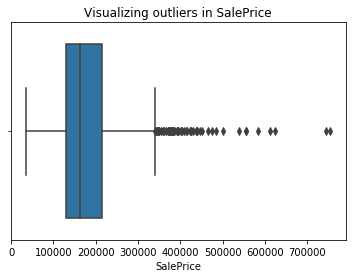

In [27]:
sns.boxplot(train_df['SalePrice'])
plt.title('Visualizing outliers in SalePrice')

Outliers may reduce the performance of our future model(s), so it might be best to remove them.

However, since they might be influential points, we will only be removing **extreme** outliers.

That is values that lie more than 3 times the interquartile range below the first quartile or above the third quartile.

In [28]:
first_quartile = train_df['SalePrice'].describe()['25%']
third_quartile = train_df['SalePrice'].describe()['75%']
iqr = third_quartile - first_quartile

train_df[(train_df['SalePrice'] < (first_quartile - 3 * iqr)) 
                        | (train_df['SalePrice'] > (third_quartile + 3 * iqr))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,63.000000,17423,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2009,New,Partial,501837
185,75,RM,90.000000,22950,Pave,None,IR2,Lvl,AllPub,Inside,...,0,None,GdPrv,None,0,6,2006,WD,Normal,475000
440,20,RL,105.000000,15431,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,4,2009,WD,Normal,555000
691,60,RL,104.000000,21535,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,1,2007,WD,Normal,755000
769,60,RL,47.000000,53504,Pave,None,IR2,HLS,AllPub,CulDSac,...,0,None,None,None,0,6,2010,WD,Normal,538000
798,60,RL,104.000000,13518,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2009,New,Partial,485000
803,60,RL,107.000000,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,1,2009,New,Partial,582933
898,20,RL,100.000000,12919,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,3,2010,New,Partial,611657
1046,60,RL,85.000000,16056,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,7,2006,New,Partial,556581
1169,60,RL,118.000000,35760,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,None,None,None,0,7,2006,WD,Normal,625000


These observations contain extreme outliers.

It is possible that some prices may have been overpriced or underpriced.

Therefore will be removed from the training data.

In [29]:
train_df = train_df[(train_df['SalePrice'] > (first_quartile - 3 * iqr)) 
                        & (train_df['SalePrice'] < (third_quartile + 3 * iqr))]

After removing the extreme outliers, the data should be more smooth and the Lognormal model should fit the data better.

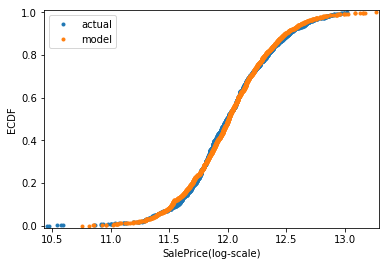

In [30]:
log_prices = np.log(train_df['SalePrice'])
x, y = generateCDF(log_prices)

#parameters to be passed to the standard normal distribution
mean = log_prices.mean()
std = log_prices.std()
size = len(train_df)


#using the rvs (random variates) method from the standard normal distribution we generate a sample with the same parameters.
sample = list(norm(loc=mean, scale=std).rvs(size=size))
xs, ys = generateCDF(sample)

plt.plot(x, y, marker='.', linestyle='', label='actual')
plt.plot(xs, ys, marker='.', linestyle='', label='model')
plt.xlabel('SalePrice(log-scale)')
plt.ylabel('ECDF')
#margins to keep the data off the plot edges.
plt.margins(0.01)
plt.legend()

The lognormal model seems to fit the distribution slightly better.

Now that we are done with outliers, we can move onto pair-wise explorations and take a look at correlations between the target SalePrice and other variables.

### **EXPLORING RELATIONSHIPS**

##### **RELATIONSHIPS BETWEEN SALEPRICE AND OTHER NUMERICAL VARIABLES**

To study the relationships between SalePrice and other numerical variables, we will take a look at the correlation coefficients.

And since we only handled **extreme** outliers, we will compute Spearman's correlation to mitigate the effect of the remaining outliers. This will also allow us to unravel monotonic relationships.

Throughout the following exploration, the names of the variables deemed decisive for the performance of our model will be saved in **final_features**.

In [31]:
# Initializing our final_feature variable
final_features = []

In [32]:
# Computing absolute Spearman's rank correlation
sp_corr = train_df.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

# Printing the top 10 most positive correlations
print("Top 15 strongest correlations\n", sp_corr.head(15), "\n\n")

# Printing the top most negative correlations
print("Top 15 weakest correlations\n", sp_corr.tail(15))

Top 15 strongest correlations
 SalePrice       1.000000
OverallQual     0.804704
GrLivArea       0.724647
GarageCars      0.682405
YearBuilt       0.651286
GarageArea      0.641203
FullBath        0.628864
TotalBsmtSF     0.594319
YearRemodAdd    0.567541
1stFlrSF        0.566580
TotRmsAbvGrd    0.522695
Fireplaces      0.512945
OpenPorchSF     0.470797
LotArea         0.446456
LotFrontage     0.422850
Name: SalePrice, dtype: float64 


Top 15 weakest correlations
 BsmtFullBath     0.221686
BsmtUnfSF        0.180412
ScreenPorch      0.090755
MoSold           0.076644
3SsnPorch        0.069042
PoolArea         0.046579
MSSubClass       0.008951
BsmtHalfBath    -0.012548
YrSold          -0.030953
BsmtFinSF2      -0.036316
MiscVal         -0.059923
LowQualFinSF    -0.076921
OverallCond     -0.124711
KitchenAbvGr    -0.166876
EnclosedPorch   -0.216281
Name: SalePrice, dtype: float64


Before investigating the variables with the weakest correlations, let's take a look at the top 5 most correlated variables: **OverallQual, GrlivArea, GarageCars, YearBuilt and GarageArea**.

**OverallQual** represents the overall material and finish of the house and ranges from 1 to 10.

In [33]:
# Creating a spreadsheet style table of median SalePrice per Quality
quality_pivot = train_df.pivot_table(values='SalePrice',
               index='OverallQual',
              aggfunc='median')

Text(0, 0.5, 'Median SalePrice')

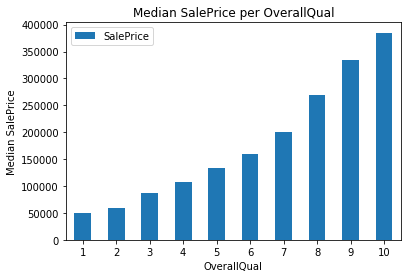

In [34]:
# Visualizing the distribution of SalePrice per quality.
quality_pivot.plot(kind='bar')
plt.title("Median SalePrice per OverallQual")
plt.xticks(rotation=0)
plt.ylabel('Median SalePrice')

As expected the distribution of SalePrice alongside the OverallQual axis is exponential. The higher the quality, the greater the price.

The overall quality definitely has an impact on the SalePrice.

In [35]:
# Adding OverallQual to the list of our final features
final_features.append('OverallQual')

How about **GrLivArea**?

This variable represents the ground living area in squarefeet (1 square feet = 0.092903 square meters).

Text(0, 0.5, 'SalePrice')

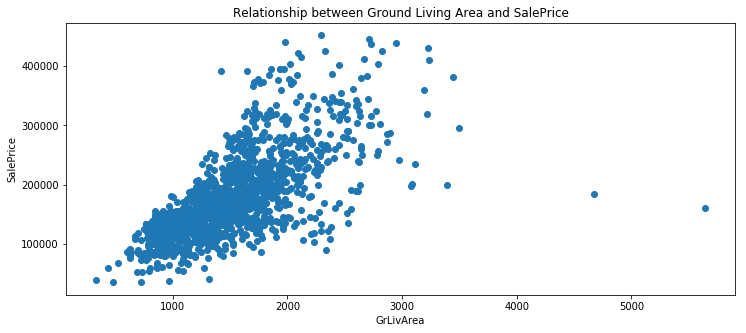

In [36]:
plt.figure(figsize=(12,5))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'])
plt.title('Relationship between Ground Living Area and SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

The shape of this plot imply that there's a linear relationship between the two variables, which confirms the high correlation coefficient.

In fact, one of the main characteristics that determine the price of a house is its ground living area.

In [37]:
# Adding GrLivArea to our final_feature list
final_features.append('GrLivArea')

However, we have two outliers that could disrupt the fit of a regression model.

Two houses with ground living areas greater than 4000sqft shouldn't cost so low.

Maybe these houses are located in areas that wouldn't attract a lot of potential buyers **if** they cost more.

In any case, we will not delete these two observations.

Later when we get to model training, we will make sure to handle outliers.


That being said, our next variable is **GarageCars**. This is the size of the garage expressed in car capacity.

In [38]:
# checking the number of unique values we have
train_df['GarageCars'].value_counts()

2    816
1    369
3    168
0     81
4      5
Name: GarageCars, dtype: int64

Since we don't have many unique values, we can compute a spreadsheet-style table of GarageCars according to SalePrice.

In [39]:
garagecars_pivot = train_df.pivot_table(values='SalePrice',
                                        index='GarageCars', 
                                       aggfunc='median')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

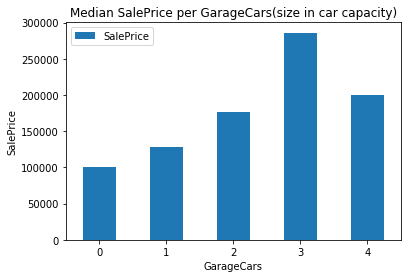

In [40]:
#Visualizing the spreadsheet
garagecars_pivot.plot(kind='bar')
plt.title("Median SalePrice per GarageCars(size in car capacity)")
plt.ylabel('SalePrice')
plt.xticks(rotation=0)

As opposed to OverallQual, we don't have a perfectly exponential distribution. The Median price for a 3-cars garage is greater than that of a 4-cars one.

That might be due to the location of the properties as well.

This variable is a good feature for our future model.

In [41]:
# Adding GarageCars in our list of features for the model
final_features.append('GarageCars')

Next we have **YearBuilt** which indicates the year a house was built.

In [42]:
# creating a spreadsheet-style table of median SalePrice per YearBuilt
year_pivot = train_df.pivot_table(values='SalePrice',
                                 index='YearBuilt',
                                 aggfunc='median')
year_pivot.head()

,SalePrice
YearBuilt,
1872,122000.0
1875,94000.0
1880,194989.5
1882,168000.0
1885,111250.0


Text(0, 0.5, 'Median SalePrice')

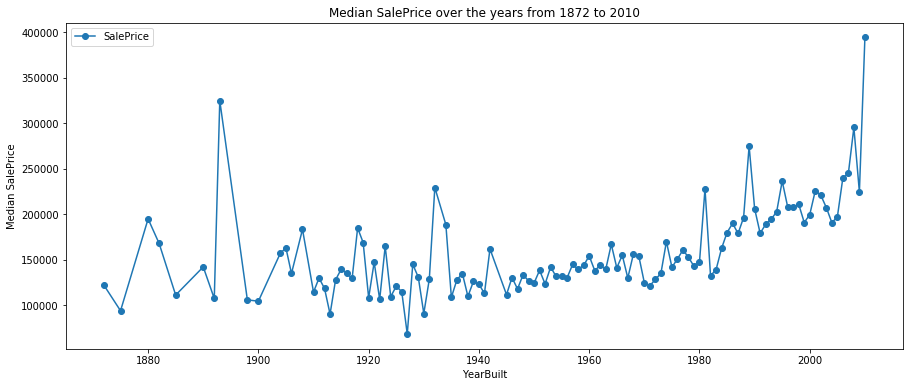

In [43]:
year_pivot.plot(marker='o', figsize=(15,6))
plt.title('Median SalePrice over the years from ' + 
          str(train_df['YearBuilt'].min()) + 
          ' to ' + str(train_df['YearBuilt'].max()))
plt.ylabel('Median SalePrice')

Although it's not apparent as to why the greater the year the higher the price, there's clearly a relationship between the two variables.

An obvious explanation would be that the older a house is the lower its price will be.

To test this inference, we can create a new column HouseAge that will represent how old each house is in years and then look at its relationship with SalePrice.

Luckily we have a variable YrSold that represents the year a house was sold.

In [44]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

In [45]:
house_age_pivot = train_df.pivot_table(values='SalePrice',
                                      index='HouseAge',
                                      aggfunc='median')

Text(0, 0.5, 'Median SalePrice')

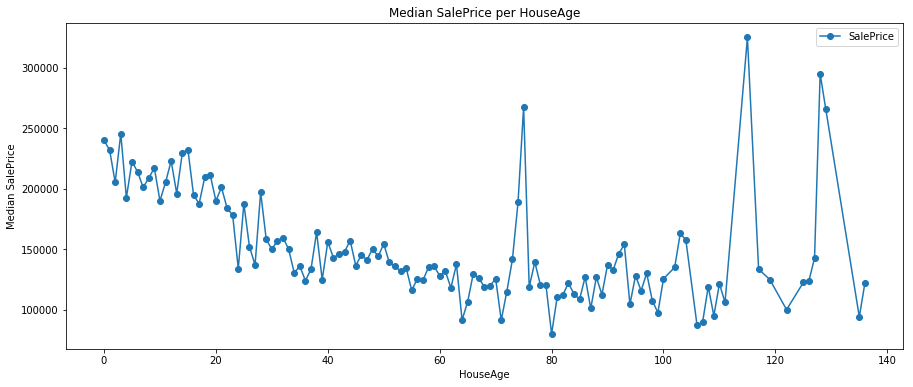

In [46]:
house_age_pivot.plot(marker='o', figsize=(15,6))
plt.title('Median SalePrice per HouseAge')
plt.ylabel('Median SalePrice')

Our inference was justified. The older the house the lower the price.

It's safe to say that this new variable is a good feature.

But before saving it, let's compare its correlation coefficient with YearBuilt's.

In [47]:
print("Correlation coefficient of HouseAge: ", abs(spearmanr(train_df['SalePrice'], train_df['HouseAge'])[0]))

Correlation coefficient of HouseAge:  0.6488329116486374


In [48]:
print("Correlation coefficient of YearBuilt: ", sp_corr['YearBuilt'])

Correlation coefficient of YearBuilt:  0.6512860010621763


Although YearBuilt is slightly more correlated, we will save HouseAge as one of our final features.

The reason being that with this recode, we were able to discover 4 potential outliers that YearBuilt did not display.

In [49]:
final_features.append('HouseAge')

Finally we have GarageArea. Just like GarageCars, this serves as a measure for the size of a garage but this time expressed in square feet.

For the sake of simplifying this analysis and given that its correlation coefficient is lower than GarageCars', we will disregard this variable.

We do have other variables with decent correlation coefficients. For these variables we will later decide whether they will be used to train our model.

For now, let's resume our analysis and take a look at some of the variables with the lowest correlations.

In [50]:
sp_corr.tail(15)

BsmtFullBath     0.221686
BsmtUnfSF        0.180412
ScreenPorch      0.090755
MoSold           0.076644
3SsnPorch        0.069042
PoolArea         0.046579
MSSubClass       0.008951
BsmtHalfBath    -0.012548
YrSold          -0.030953
BsmtFinSF2      -0.036316
MiscVal         -0.059923
LowQualFinSF    -0.076921
OverallCond     -0.124711
KitchenAbvGr    -0.166876
EnclosedPorch   -0.216281
Name: SalePrice, dtype: float64

Spearman's rank-order correlation measures the strength and direction of the monotonicity between two variables. So if a relationship is non-monotonic its correlation will be underestimated.

So to make sure that we are not overlooking a potential existing relationship between either of the variables and SalePrice, we can apply a nonlinear transformation to the variables.

To do so we will:
- retrieve the corresponding variables
- apply square root transformations to the variables
- compute the Spearman's correlation and compare the results

In [51]:
# Retrieving variables
variables = list(sp_corr.tail(15).index)

# Adding SalePrice's label
variables.append('SalePrice')

# Applying square root transformations to the variables
transformed_variables = np.sqrt(train_df[variables])

# Computing new correlations
new_corr = transformed_variables.corr()['SalePrice']

# Checking differences between the original correlations and the new ones
new_corr - sp_corr.tail(15)

3SsnPorch       -0.005785
BsmtFinSF2       0.009972
BsmtFullBath     0.021525
BsmtHalfBath    -0.008374
BsmtUnfSF        0.027135
EnclosedPorch    0.040054
KitchenAbvGr     0.024396
LowQualFinSF     0.008973
MSSubClass      -0.059770
MiscVal          0.014813
MoSold          -0.002015
OverallCond      0.084285
PoolArea        -0.009538
SalePrice             NaN
ScreenPorch     -0.004489
YrSold          -0.004066
Name: SalePrice, dtype: float64

As seen from the differences, the square root transformation does not seem to have resulted in any stronger relationships.

Consequently this concludes the search for relationships between SalePrice and other numerical variables.

##### **RELATIONSHIPS BETWEEN SALEPRICE AND CATEGORICAL VARIABLES**

It's now time to look for potential relationships between SalePrice and categorical variables.

To do so, first we will make a dataframe containing only categorical variables and SalePrice.

In [52]:
# Selecting categorical variables
categoricals = train_df.select_dtypes(exclude=['number'])
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal
